# Lebron Decision 3.0 - The Lakers Edition

In late June - early July 2018, the Twitter world was ablaze with activity after the announcement of Lebron James's decision to become an unrestricted free agent. Merely weeks earlier he led the Cleveland Cavaliers to their 7th NBA Championship Game Finals to go against the Golden State Warriors. However, unlike their previous Champion Final encounters (2015, 2016 and 2017), this year the Warriors completely obliterated  the Cavaliers with a straight sweep, winning the NBA Finals 4 games to Cleveland's 0.

In this project I give you a glimpe into the world of NBA Twitter 24 hours before and 24 hours after that Tweet went live. This notebook will be broken down into the following sections:

1. 2018 NBA Finals Championship Game Analysis
2. Overview of Twitter scraping
3. Statistical analysis of the tweets scrapped.
4. Sentiment analysis of the tweets scrapped.
5. Closing notes.

## 2018 NBA Finals Championship Game Analysis

Before investigating the public's response to Lebron's free-agency announcement, it is imperative to understand his decision behind the move. Analysis of the 2018 NBA Finals can provide great insight into his reasons for leaving Cleveland.  

In [1]:
import pandas as pd
from nba_py import game
import math
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d.art3d as art3d
from IPython.display import Image

Import 2018 Finals games

In [2]:
df_g1 = pd.DataFrame(game.Boxscore("0041700401").player_stats())
df_g2 = pd.DataFrame(game.Boxscore("0041700402").player_stats())
df_g3 = pd.DataFrame(game.Boxscore("0041700403").player_stats())
df_g4 = pd.DataFrame(game.Boxscore("0041700404").player_stats())

List of players in the first 2018 Finals game

In [3]:
player_stats = df_g1.filter(['PLAYER_ID','PLAYER_NAME', 'TEAM_ABBREVIATION'], axis=1)

In [4]:
getcols = ['PTS', 'REB', 'AST']
for cols in getcols:
    player_stats[cols] = 0

In [5]:
def pop_stats(df, player_stats,getcols):
    for pid in df['PLAYER_ID']:
        # player exists in df
        if player_stats['PLAYER_ID'].isin([pid]).any():
            for cols in getcols:
                if not math.isnan(df.loc[df['PLAYER_ID'] == pid, cols].iloc[0]):
                    tempPTS = df.loc[df['PLAYER_ID'] == pid, cols].iloc[0]
                    idx = player_stats.index[player_stats['PLAYER_ID'] == pid]
                    tempBefore = player_stats[cols][idx[0]]
                    player_stats.at[idx, cols] = tempPTS + tempBefore
        else:
            newcols = ['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ABBREVIATION', 'PTS', 'REB', 'AST']
            new_player = pd.DataFrame(index=[len(player_stats)], columns=newcols)
            for cols in newcols:
                new_player[cols] = df.loc[df['PLAYER_ID'] == pid, cols].iloc[0]
            player_stats = player_stats.append(new_player)
    return player_stats
                
player_stats = pop_stats(df_g1,player_stats,getcols)
player_stats = pop_stats(df_g2,player_stats,getcols)
player_stats = pop_stats(df_g3,player_stats,getcols)
player_stats = pop_stats(df_g4,player_stats,getcols)

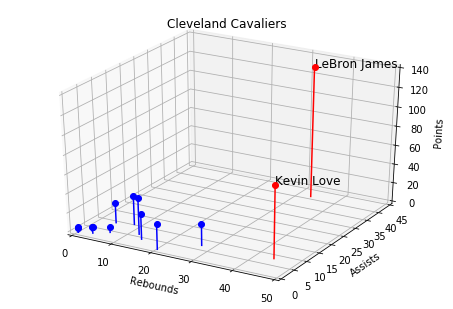

In [6]:
fig = pyplot.figure()
ax = Axes3D(fig)

for pid in player_stats['PLAYER_ID']:
    tempteam=player_stats.loc[player_stats['PLAYER_ID'] == pid, 'TEAM_ABBREVIATION'].item()
    if tempteam=='CLE':
        w, h = 3, 1;
        ptemp = [[0 for x in range(w)] for y in range(h)]
        for pos,cols in enumerate(['REB', 'AST', 'PTS']):
            ptemp[0][pos]=player_stats.loc[player_stats['PLAYER_ID'] == pid, cols].item()
        if (pid==2544) or (pid==201567):
            ax.text(ptemp[0][0],ptemp[0][1],ptemp[0][2],player_stats.loc[player_stats['PLAYER_ID'] == pid, \
                'PLAYER_NAME'].item(),size=12,zorder=1,color='k')
            pcolour='r'
        else:
            pcolour='b'
        for xi, yi, zi in zip([ptemp[0][0]], [ptemp[0][1]], [ptemp[0][2]]):  
            line=art3d.Line3D(*zip((xi, yi, 0), (xi, yi, zi)),c=pcolour, marker='o', markevery=(1, 1))
            ax.add_line(line)
        
ax.set_xlim3d(0, 50)
ax.set_ylim3d(0, 45)
ax.set_zlim3d(0,140)  
ax.set_xlabel('Rebounds')
ax.set_ylabel('Assists')
ax.set_zlabel('Points')
pyplot.title("Cleveland Cavaliers")
pyplot.show()

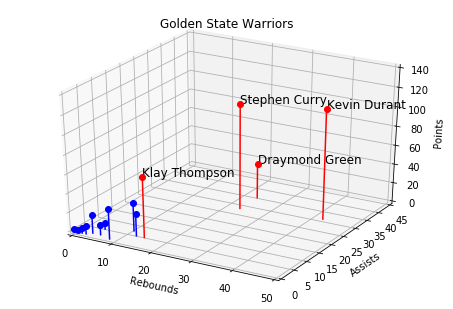

In [7]:
fig = pyplot.figure()
ax = Axes3D(fig)

for pid in player_stats['PLAYER_ID']:
    tempteam=player_stats.loc[player_stats['PLAYER_ID'] == pid, 'TEAM_ABBREVIATION'].item()
    if tempteam=='GSW':
        w, h = 3, 1;
        ptemp = [[0 for x in range(w)] for y in range(h)]
        for pos,cols in enumerate(['REB', 'AST', 'PTS']):
            ptemp[0][pos]=player_stats.loc[player_stats['PLAYER_ID'] == pid, cols].item()
        if (pid==201142) or (pid==203110) or (pid==202691) or (pid==201939):
            ax.text(ptemp[0][0],ptemp[0][1],ptemp[0][2],player_stats.loc[player_stats['PLAYER_ID'] == pid, \
                'PLAYER_NAME'].item(),size=12,zorder=1,color='k')
            pcolour='r'
        else:
            pcolour='b'
        for xi, yi, zi in zip([ptemp[0][0]], [ptemp[0][1]], [ptemp[0][2]]):  
            line=art3d.Line3D(*zip((xi, yi, 0), (xi, yi, zi)),c=pcolour, marker='o', markevery=(1, 1))
            ax.add_line(line)
        
ax.set_xlim3d(0, 50)
ax.set_ylim3d(0, 45)
ax.set_zlim3d(0,140)  
ax.set_xlabel('Rebounds')
ax.set_ylabel('Assists')
ax.set_zlabel('Points')
pyplot.title("Golden State Warriors")
pyplot.show()

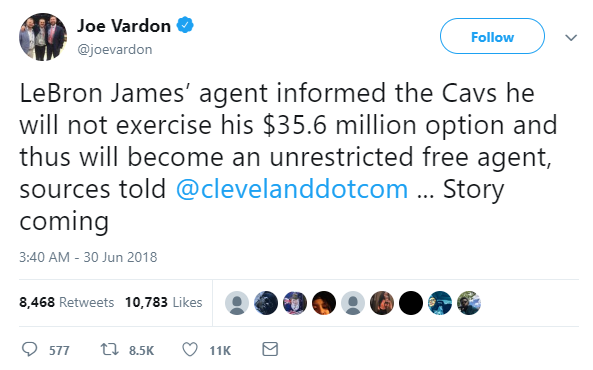

In [8]:
from IPython.display import Image
display(Image(filename='img/lebron_free_agent.PNG', embed=True))

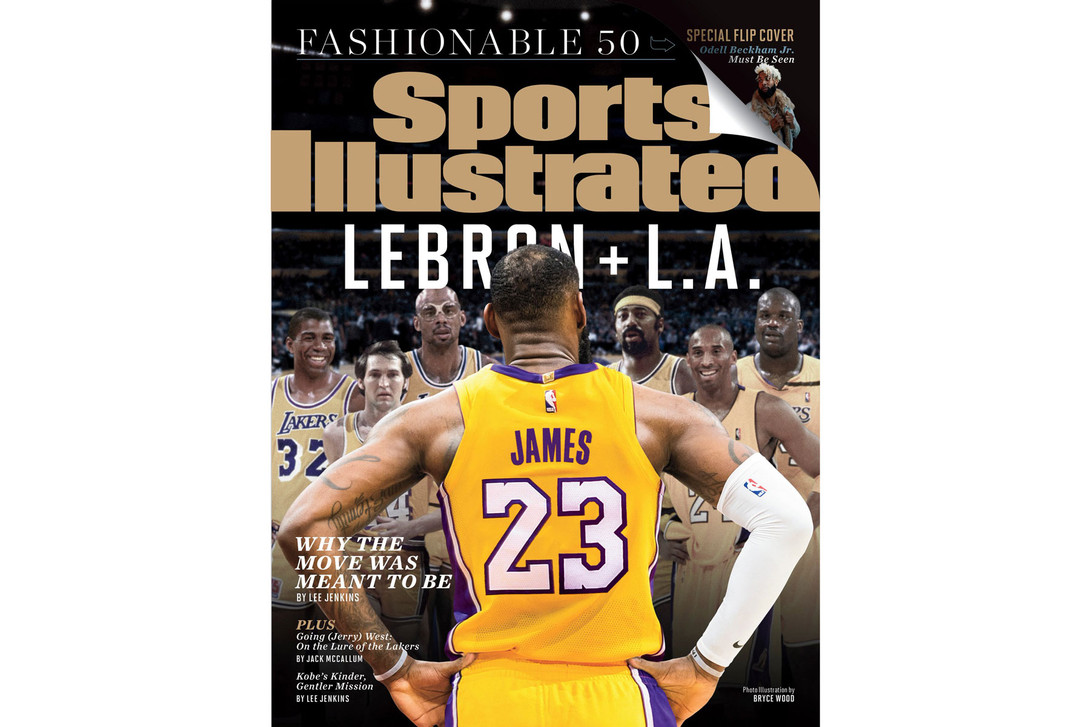

In [9]:
display(Image(filename='img/lebron_laker.jpg', embed=True))